### Adding salt and pepper to the input image

Noise -> Random phenomenon -> Undesirable

**Types of noise:** 

- Additive noise(Gaussian Noise), 
- Multiplicative noise(Speckle noise),
- Impulse noise(Salt and Pepper noise),
- Periodic Noise (Sinusoidal)

**Salt & Pepper Noise**
- Random occurance of black and white pixels

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [7]:
img = cv2.imread('./cameraman.tif',0)
m,n = img.shape

**Parameters required**
- probability = 0.1
- threshold = 1-probability
- img_noise = np.zeros([m,n])

In [13]:
prob = 0.01
thresh = 1-prob
img_noise = np.zeros((m,n))

In [14]:
for i in range(0,m):
    for j in range(0,n):
        rnd = np.random.random()
        if rnd<prob:
            img_noise[i,j] = 0
        elif rnd>thresh:
            img_noise[i,j] = 255
        else:
            img_noise[i,j] = img[i,j]

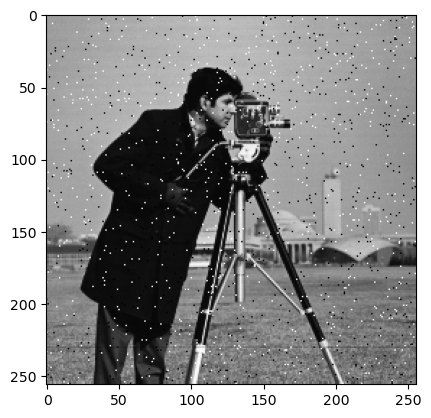

In [15]:
plt.imshow(img_noise,cmap='gray')

### Mitigate salt and pepper noise

**Use median Fiter**

In [16]:
from scipy import signal

In [28]:
filtered_img = signal.medfilt2d(img_noise,3)

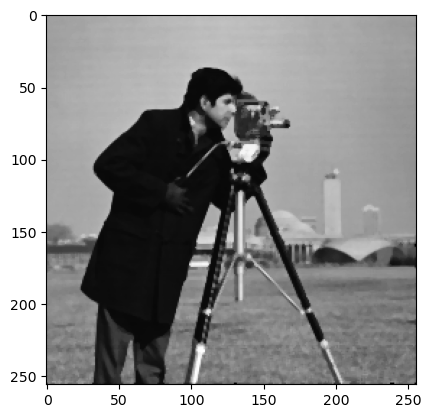

In [29]:
plt.imshow(filtered_img,cmap='gray')

In [31]:
h = 1/9*np.ones((3,3))
mean_filtered_noise = cv2.filter2D(img_noise,-1,h)

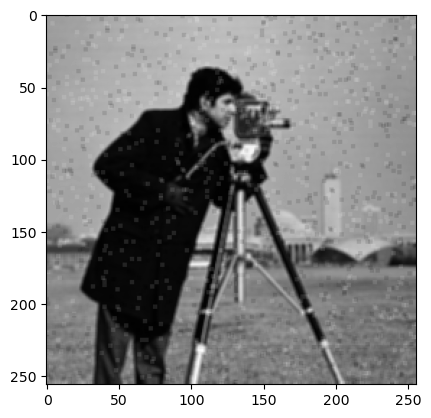

In [33]:
plt.imshow(mean_filtered_noise,cmap='gray')

### Edge - Edge Detection

**Edge:** 
- It represents sharp change in gray level.
- Represents Discontinuity

**Types of edges:**
- Step edge
- Ramp edge
- Roof edge and many more
  

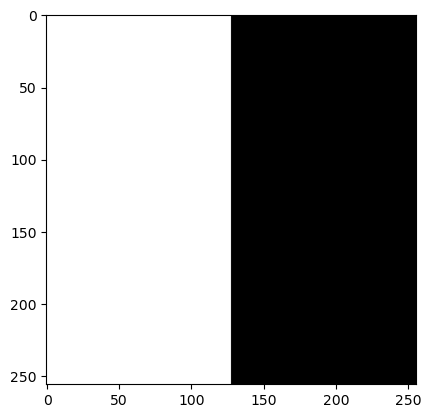

In [34]:
img = np.zeros((256,256))
img[:,:128] = 255
plt.imshow(img,cmap='gray')

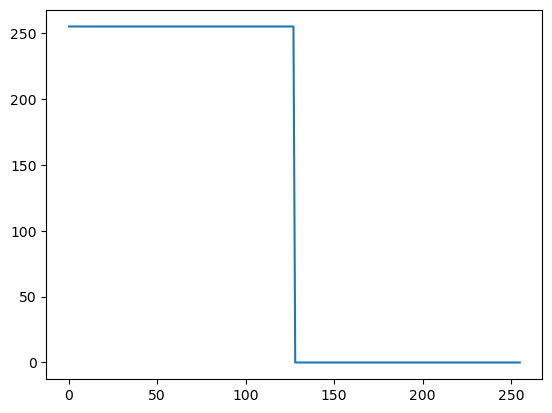

In [35]:
plt.plot(img[128,:])

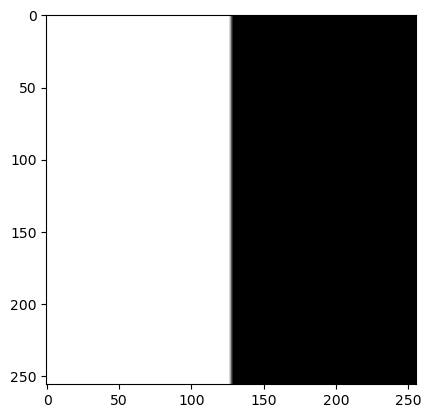

In [38]:
img_lpf = cv2.filter2D(img,-1,1/9*np.ones((3,3)))
plt.imshow(img_lpf,cmap='gray')